<a href="https://colab.research.google.com/github/Roshan6288/Roshan-Sharma/blob/main/netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
from google.colab import files
import io

try:
    df = pd.read_csv('/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
except FileNotFoundError:
    print("File not found. Please upload the 'NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv' file.")
    uploaded = files.upload()
    file_name = next(iter(uploaded))
    print(f'User uploaded file "{file_name}"')
    df = pd.read_csv(io.StringIO(uploaded[file_name].decode('utf-8')))
display(df.head())

File not found. Please upload the 'NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv' file.


Saving NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv to NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv
User uploaded file "NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv"


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [10]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


In [11]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())


In [12]:
df['director']=pd.DataFrame(df['director'].fillna(df['director'].mode()[0]))

In [13]:
df['cast']=pd.DataFrame(df['cast'].fillna(df['cast'].mode()[0]))

In [14]:
df['country']=pd.DataFrame(df['country'].fillna(df['country'].mode()[0]))

In [15]:
df['date_added']=pd.DataFrame(df['date_added'].fillna(df['date_added'].mode()[0]))

In [16]:
df['rating']=pd.DataFrame(df['rating'].fillna(df['rating'].mode()[0]))

In [17]:
df=df.drop_duplicates()

In [18]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      7787 non-null   object
 4   cast          7787 non-null   object
 5   country       7787 non-null   object
 6   date_added    7787 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7787 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,"Raúl Campos, Jan Suter","João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

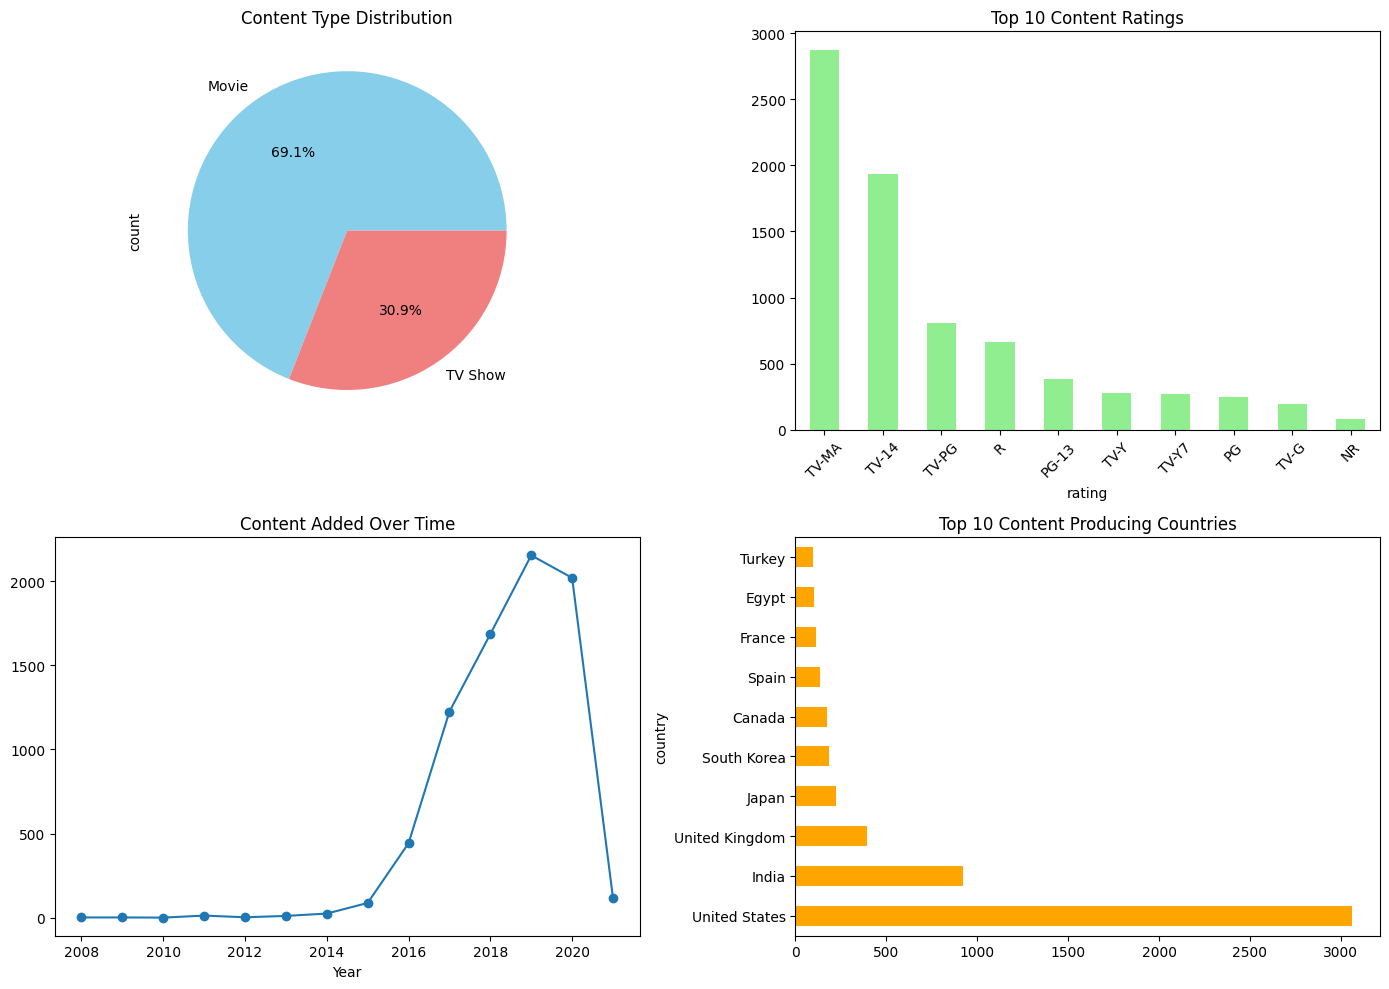

In [25]:
# Set up the figure
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Amount of content by type (Movie vs. TV Show)
df['type'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0,0], colors=['skyblue', 'lightcoral'])
axes[0,0].set_title('Content Type Distribution')

# 2. Amount of content by rating (Top 10)
df['rating'].value_counts().head(10).plot.bar(ax=axes[0,1], color='lightgreen')
axes[0,1].set_title('Top 10 Content Ratings')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Content added over the years (trend)
df['year_added'] = pd.to_datetime(df['date_added'], format='mixed', dayfirst=False).dt.year
df['year_added'].value_counts().sort_index().plot(ax=axes[1,0], marker='o')
axes[1,0].set_title('Content Added Over Time')
axes[1,0].set_xlabel('Year')

# 4. Top producing countries
df['country'].value_counts().head(10).plot.barh(ax=axes[1,1], color='orange')
axes[1,1].set_title('Top 10 Content Producing Countries')

plt.tight_layout()
plt.show()

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english', max_features=500)
description_features = tfidf.fit_transform(df['description'].fillna(''))

genres_split = df['listed_in'].str.get_dummies(sep=', ')

X = description_features
print(f"Feature matrix shape for clustering: {X.shape}")

Feature matrix shape for clustering: (7787, 500)


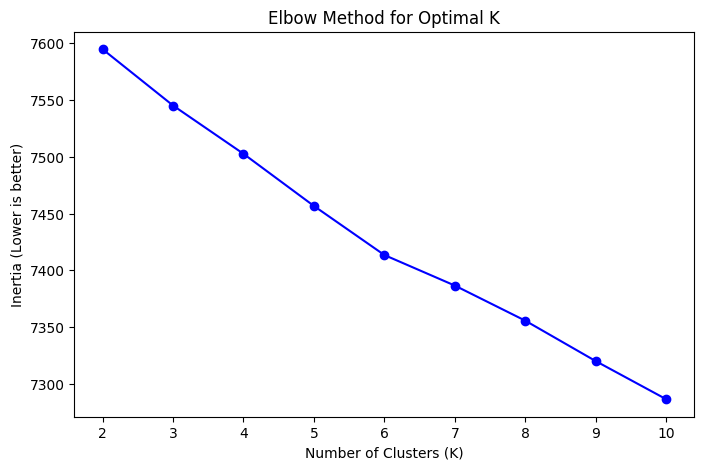

Assigned all titles to 5 clusters.
cluster
0     555
1     828
2     371
3     621
4    5412
Name: count, dtype: int64


In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Lower is better)')
plt.title('Elbow Method for Optimal K')
plt.show()

chosen_k = 5
final_kmeans = KMeans(n_clusters=chosen_k, random_state=42, n_init=10)
df['cluster'] = final_kmeans.fit_predict(X)
print(f"Assigned all titles to {chosen_k} clusters.")
print(df['cluster'].value_counts().sort_index())

In [24]:
cluster_to_check = 0
cluster_sample = df[df['cluster'] == cluster_to_check]

print(f"\n--- Sample titles from Cluster {cluster_to_check} ---")
print(cluster_sample[['title', 'type', 'listed_in']].head(5).to_string(index=False))

print(f"\n--- Common Genres in Cluster {cluster_to_check} ---")

all_genres = ' '.join(cluster_sample['listed_in'].fillna('')).split(', ')
print(pd.Series(all_genres).value_counts().head(5))

print(f"\n--- Common Countries in Cluster {cluster_to_check} ---")
print(cluster_sample['country'].value_counts().head(3))


--- Sample titles from Cluster 0 ---
        title    type                                          listed_in
          187   Movie                                             Dramas
         1994 TV Show Crime TV Shows, Docuseries, International TV Shows
  ​Mayurakshi   Movie                       Dramas, International Movies
  Çarsi Pazar   Movie                     Comedies, International Movies
1 Mile to You   Movie             Dramas, Romantic Movies, Sports Movies

--- Common Genres in Cluster 0 ---
Dramas                    53
International Movies      40
Independent Movies        24
Korean TV Shows           19
International TV Shows    17
Name: count, dtype: int64

--- Common Countries in Cluster 0 ---
country
United States    263
India             43
South Korea       20
Name: count, dtype: int64
